In [1]:
!pip install rectpack

  Preparing metadata (setup.py) ... done
  Created wheel for rectpack: filename=rectpack-0.2.2-py3-none-any.whl size=19334 sha256=db830091e062b4de9b82a334329691e0aae2de8b57f215774ebcc29adab74e81
  Stored in directory: /root/.cache/pip/wheels/e9/ea/e9/cd0237c0ccb9cb7312bb94cc023689592c4f07e4f3b1b9dd00
Successfully built rectpack


Packed pallets:
Item 0: 800x1200, Position: (0, 1200)
Item 1: 1000x1200, Position: (800, 1200)
Item 2: 1000x1200, Position: (1800, 1200)
Item 3: 1200x1200, Position: (2800, 1200)
Item 4: 1200x1200, Position: (4000, 1200)
Item 5: 1200x1200, Position: (5200, 1200)
Item 6: 1200x1200, Position: (6400, 1200)
Item 7: 1200x1200, Position: (7600, 1200)
Item 8: 1200x1200, Position: (8800, 1200)
Item 9: 1200x1200, Position: (10000, 1200)
Item 10: 1200x1200, Position: (11200, 1200)
Item 11: 1200x1200, Position: (12400, 1200)


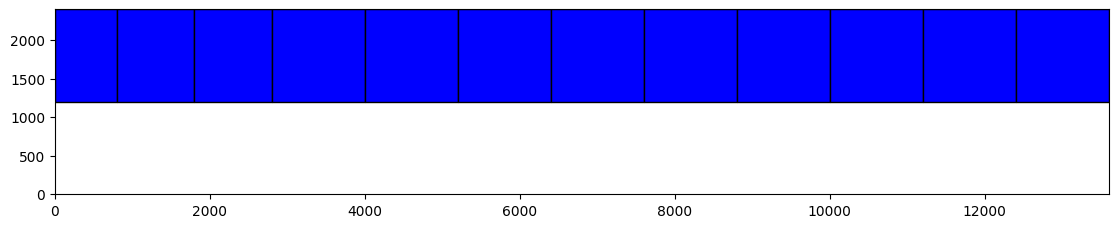

In [26]:

import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Bin:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.items = []

    def add_item(self, item):
        self.items.append(item)

class Item:
    def __init__(self, width, height, index):
        self.width = width
        self.height = height
        self.x = None
        self.y = None
        self.index = index

def pack_items_shelf(items, bin_width, bin_height):
    bins = [Bin(bin_width, bin_height)]
    for i, item in enumerate(items):
        if item.width <= bin_width and item.height <= bin_height:
            best_bin = None
            best_height = float('inf')
            for bin in bins:
                if bin.width >= item.width and bin.height >= item.height:
                    if bin.height < best_height:
                        best_bin = bin
                        best_height = bin.height
            if best_bin is not None:
                item.x = bin_width - best_bin.width
                item.y = 1200
                item.index = i
                best_bin.add_item(item)
                best_bin.width -= item.width
                if item.height < best_bin.height:
                    new_bin = Bin(item.width, best_bin.height - item.height)
                    new_bin.items = [x for x in best_bin.items if x.index != item.index]
                    best_bin.height = item.height
                    new_bin.width = best_bin.width
                    bins.append(new_bin)
    return bins

def plot_bins(bins):
    fig, ax = plt.subplots(figsize=(13.6,2.4))
    colors = ['b']
    for i, bin in enumerate(bins):
        for item in bin.items:
            ax.add_patch(plt.Rectangle((item.x, item.y), item.width, item.height, facecolor=colors[i], edgecolor='black'))
            print(f"Item {item.index}: {item.width}x{item.height}, Position: ({item.x}, {item.y})")
    ax.set_xlim(0, 13600)
    ax.set_ylim(0, 2400)
    plt.show()

# Example usage
items = [Item(800, 1200, i) for i in range(1)] + [Item(1000, 1200, i) for i in range(2)] + [Item(1200, 1200, i) for i in range(11)]
bins = pack_items_shelf(items, 13600, 1200)
print("Packed pallets:")
plot_bins(bins)
